# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

* 가설1 : INCOME(연수입액) 대비 CHURN(이탈여부)

* 가설2 : OVERAGE(월 초과사용 시간) 대비 CHURN(이탈여부)

* 가설3 : HOUSE(집가격) 대비 CHURN(이탈여부)

* 가설4 : REPORTED_SATISFACTION(만족도설문) 대비 CHURN(이탈여부)

* 가설5 : CONSIDERING_CHANGE_OF_PLAN(변경 계획 설문) 대비CHURN(이탈여부)

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) INCOME

In [3]:
var='INCOME'

① 변수의 비즈니스 의미

In [ ]:
연 수입액(달러)

② 숫자, 범주?

In [ ]:
숫자

③ NaN 존재 유무

In [4]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [5]:
mobile[var].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

⑤ 분포 확인(시각화)

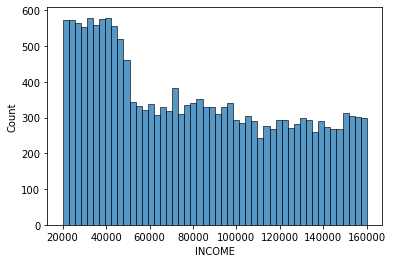

In [6]:
sns.histplot(mobile[var], bins = 50)
plt.show()

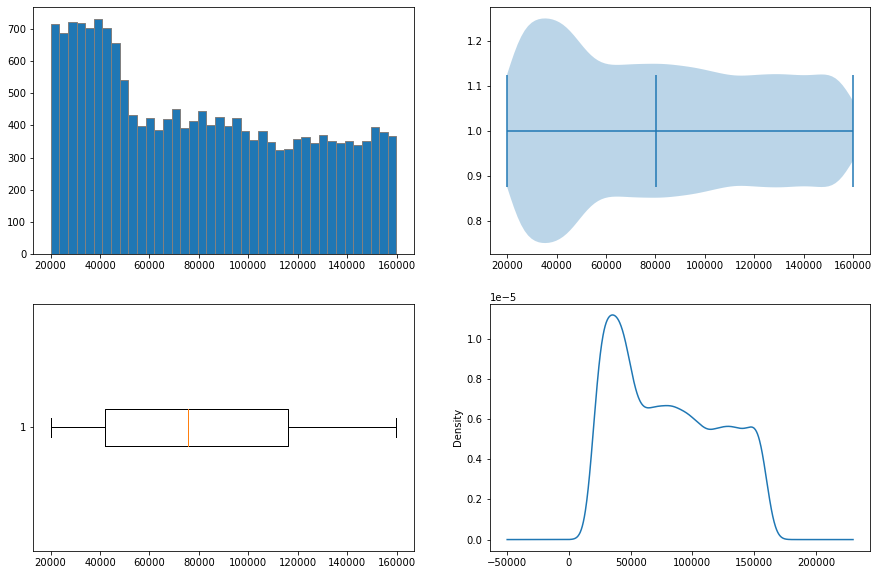

In [7]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
plt.hist(mobile[var], bins = 40, edgecolor = "gray")

plt.subplot(2,2,2)
plt.violinplot(mobile[var], vert = False, showmeans = True)

plt.subplot(2,2,3)
plt.boxplot(mobile[var], vert = False)

plt.subplot(2,2,4)
pd.Series(mobile[var]).plot(kind = "kde")

plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
연 수입액의 평균값은 80000달러 이지만 20000-50000사이의 수입액이 가장 많음
60000달러 이상으로는 비슷한 수치를 보임

⑦ 추가 분석해 볼 사항이 있나요?

In [ ]:
연 수입액과 집 가격을 비교해 이탈여부를 알 수 있을까?

### 2) OVERAGE

In [8]:
var = 'OVERAGE'

① 변수의 비즈니스 의미

In [ ]:
월 초과사용 시간 (분)

② 숫자, 범주?

In [ ]:
숫자

③ NaN 존재 유무

In [9]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [10]:
mobile[var].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

⑤ 분포 확인(시각화)

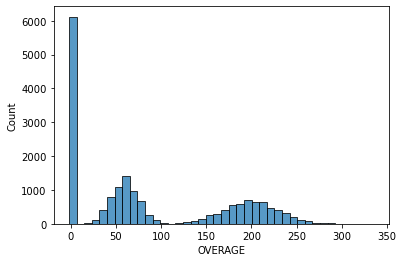

In [11]:
sns.histplot(mobile[var], bins = 40)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
평균값이 80분이지만 초과수치가 0분인 데이터가 반 이상을 차지함.


⑦ 추가 분석해 볼 사항이 있나요?

In [ ]:
최소값 -2를 어떻게 처리할 것인가?
개인휴대폰이 아닌 전화업무용 번호로 쓰인게 아닌가?
휴대 전화의 용도를 알 수 있을까?

### 3) HOUSE

In [45]:
var ='HOUSE'

① 변수의 비즈니스 의미

In [ ]:
집 가격(달러)

② 숫자, 범주?

In [ ]:
숫자

③ NaN 존재 유무

In [13]:
mobile[var].isna().sum()

215

#### 결측치 처리

In [46]:
mobile_null = mobile.copy()

In [47]:
print(mobile_null.isnull().sum())

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64


In [48]:
mobile_null.dropna(subset=['HOUSE'], axis=0, inplace=True)

In [49]:
print(mobile_null.isnull().sum())

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION         38
CONSIDERING_CHANGE_OF_PLAN     0
CHURN                          0
dtype: int64


④ 기초통계량(수치화)

In [50]:
mobile_null[var].describe()

count     17785.000000
mean     492950.532696
std      252175.173507
min      150015.000000
25%      263876.000000
50%      452277.000000
75%      701460.000000
max      999970.000000
Name: HOUSE, dtype: float64

⑤ 분포 확인(시각화)

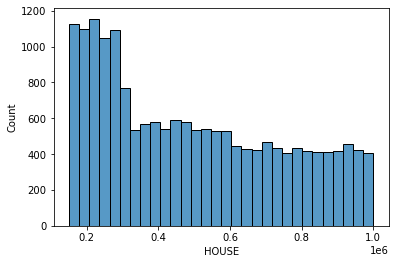

In [51]:
sns.histplot(mobile_null[var], bins = 30)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
INCOME 데이터와 비슷한 양상을 보이고 있음

⑦ 추가 분석해 볼 사항이 있나요?

In [ ]:
INCOME데이터와 HOUSE는 관련이 있는 데이터일까?

### 4) REPORTED_SATISFACTION

In [14]:
var='REPORTED_SATISFACTION'

① 변수의 비즈니스 의미

In [ ]:
만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )

② 숫자, 범주?

In [ ]:
범주

③ NaN 존재 유무

In [15]:
mobile[var].isna().sum()

38

④ 기초통계량(수치화)

In [16]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


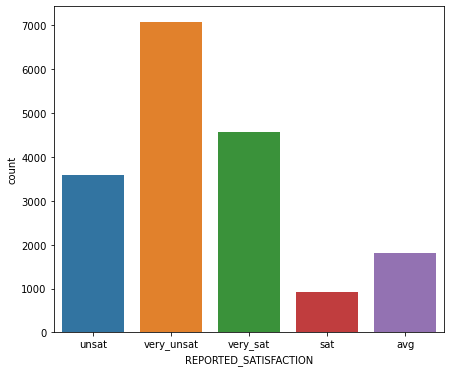

In [17]:
plt.figure(figsize = (7,6))
sns.countplot(mobile[var])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
매우 불만족이라고 응답한 사람이 가장 많고 다음으로 매우 만족, 불만족, 보통, 만족 순서이다.


⑦ 추가 분석해 볼 사항이 있나요?

In [ ]:
불만족이 높을수록 이탈률이 더 많을까?

### 5) CONSIDERING_CHANGE_OF_PLAN

In [18]:
var='CONSIDERING_CHANGE_OF_PLAN'

① 변수의 비즈니스 의미

변경 계획 설문 ('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it')

② 숫자, 범주?

In [ ]:
범주

③ NaN 존재 유무

In [19]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [20]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


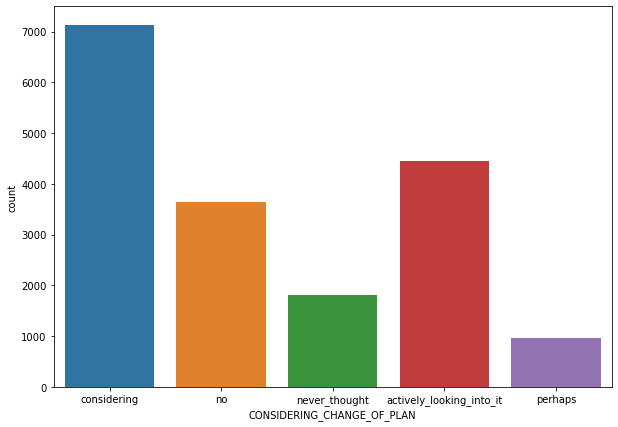

In [21]:
plt.figure(figsize = (10,7))
sns.countplot(mobile[var])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
50% 이상이 변경할 계획이 있다고 응답함


⑦ 추가 분석해 볼 사항이 있나요?

In [ ]:
변경을 하기로 결정한 원인의 데이터가 있을까?

### 6) HANDSET_PRICE

In [54]:
var='HANDSET_PRICE'

① 변수의 비즈니스 의미

In [ ]:
핸드폰 가격(달러)

② 숫자, 범주?

In [ ]:
숫자

③ NaN 존재 유무

In [55]:
mobile[var].isna().sum()

0

④ 기초통계량(수치화)

In [56]:
mobile[var].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

⑤ 분포 확인(시각화)

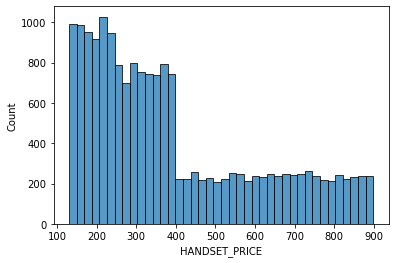

In [57]:
sns.histplot(mobile[var], bins = 40)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
400달러 이하의 핸드폰이 압도적으로 많다.
400달러를 기준으로 큰 차이를 보이는데, 이유가 무엇일까?
400달러 이하의 핸드폰을 사면 혜택을 줄까?

⑦ 추가 분석해 볼 사항이 있나요?

In [ ]:
핸드폰의 가격 기준이 400달러일까?

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [22]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [23]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49272222222222223


#### 1) REPORTED_SATISFACTION --> CHURN

In [ ]:
만족도 설문 대비 이탈여부

① 교차표(pd.crosstab())

In [24]:
temp = pd.crosstab(mobile['REPORTED_SATISFACTION'], mobile['CHURN'], normalize = 'index')
print(temp)

CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


② 시각화( Stacked Bar, Mosaic)

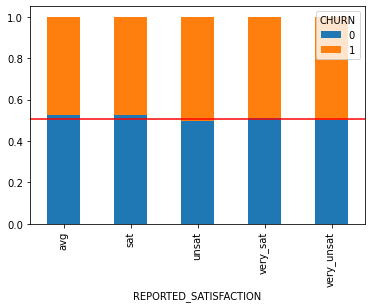

In [25]:
# 2) stacked bar!
temp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

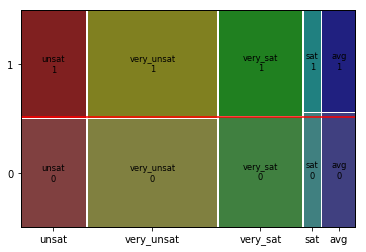

In [28]:
mosaic(mobile, [ 'REPORTED_SATISFACTION','CHURN'])

plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 이탈률 평균수치와 비교해보니 매우 불만족, 불만족 이라고 응답한 사람의 이탈률이 많았고 보통,만족이라고 응답한 사람은 이탈률이 평균보다 적었다

* 대부분의 응답이 평균값과 큰 차이를 보이지 않는다

③ 가설검정(카이제곱검정)

In [29]:
# 먼저 집계 ( nomalize 사용 안함) 카이제곱 값이 클수록 상관관계가 있다.
table = pd.crosstab(mobile['REPORTED_SATISFACTION'], mobile['CHURN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 CHURN                     0     1
REPORTED_SATISFACTION            
avg                     952   854
sat                     492   440
unsat                  1792  1798
very_sat               2334  2228
very_unsat             3543  3529
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.841100957205645
p-value 0.14452738878905058
기대빈도
 [[ 916.27201871  889.72798129]
 [ 472.84912593  459.15087407]
 [1821.38236277 1768.61763723]
 [2314.5254426  2247.4745574 ]
 [3587.97104999 3484.02895001]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* p-value의 값이 0.14로 나온것을 보아 만족도 설문과 이탈여부는 큰 상관관계가 있는것으로 보이지 않는다.

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [ ]:
변경 계획 설문 대비 이탈여부

① 교차표(pd.crosstab())

In [30]:
temp = pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'], mobile['CHURN'], normalize = 'index')
print(temp)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


② 시각화( Stacked Bar, Mosaic)

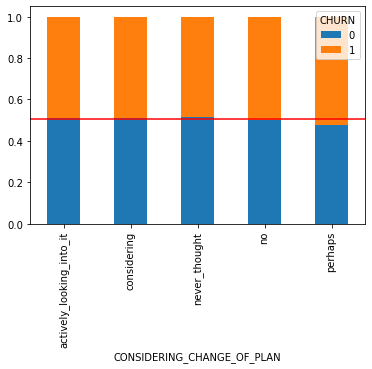

In [31]:
# 2) stacked bar!
temp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

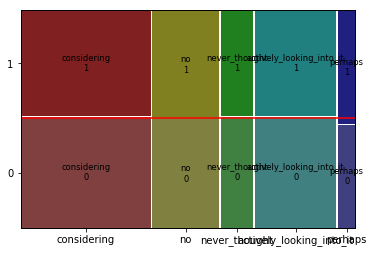

In [32]:
mosaic(mobile, [ 'CONSIDERING_CHANGE_OF_PLAN','CHURN'])

# 평균선 추가
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
perhaps 이라고 응답한 사람이 가장 많이 이탈했다.


③ 가설검정(카이제곱검정)

In [33]:
table = pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'],mobile['CHURN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 CHURN                          0     1
CONSIDERING_CHANGE_OF_PLAN            
actively_looking_into_it    2278  2175
considering                 3648  3493
never_thought                926   878
no                          1823  1821
perhaps                      456   502
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.421434419620688
p-value 0.24672225866799702
기대빈도
 [[2258.90794444 2194.09205556]
 [3622.47061111 3518.52938889]
 [ 915.12911111  888.87088889]
 [1848.52022222 1795.47977778]
 [ 485.97211111  472.02788889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* pvalue의 값이 0.24로 나온 것을 보아 변경 계획 설문 대비 이탈률은 큰 연관성이 없다고 보인다
* Stacked Bar에서 평균선과 대부분의 데이터가 일치한다

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


In [ ]:
연 수입액 대비 이탈여부

① 그래프 : histogram, densityplot

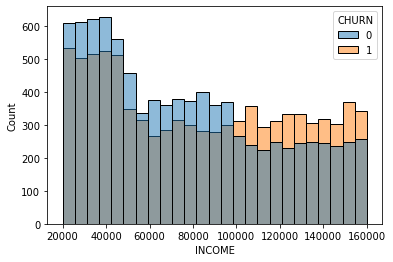

In [34]:
sns.histplot(x='INCOME', data =mobile, hue = 'CHURN')
plt.show()

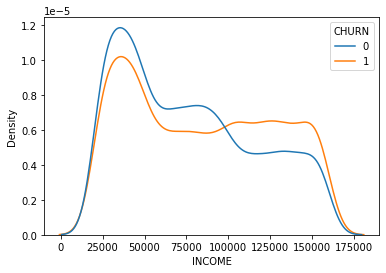

In [35]:
sns.kdeplot(x='INCOME', data =mobile, hue = 'CHURN', common_norm=False) 
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
연 수입액 100000을 기준으로 잔여와 이탈로 나뉜다. 왜일까?
연수입액이 높으면 왜 이탈을 할까?
더 좋은 기종으로 바꿀까?
휴대폰을 자주 바꾸는 것과 관련이 있을까?

② 수치화 : 로지스틱회귀

In [36]:
model = sm.Logit(mobile['CHURN'], mobile['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
수치화를 통해 보았을 때 어느정도 약하게 상관관계가 있어보인다.

#### 2) OVERAGE --> CHURN


In [ ]:
월 초과사용 시간(분) 대비 이탈여부

① 그래프 : histogram, densityplot

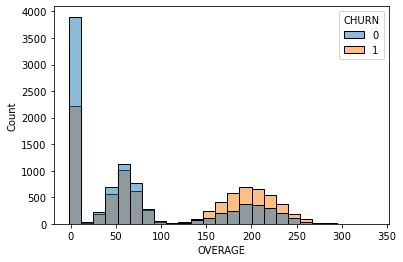

In [37]:
sns.histplot(x='OVERAGE', data =mobile, hue = 'CHURN')
plt.show()

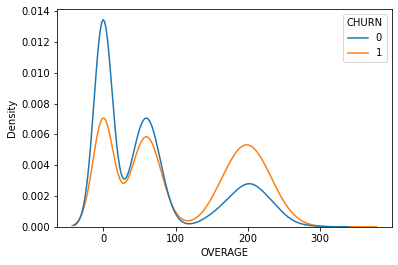

In [38]:
sns.kdeplot(x='OVERAGE', data =mobile, hue = 'CHURN', common_norm=False) 
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
월 초과사용시간 100분을 기준으로 잔여와 이탈로 구분지어진다.
100분 이하는 잔여, 이상은 이탈의 수치가 보인다.
일정 통화 이상을 하면 다른 통신사에서 혜택을 주는걸까? (요금할인 등등)
우리 통신사의 통화 품질이 안 좋을까 ?

② 수치화 : 로지스틱회귀

In [39]:
model = sm.Logit(mobile['CHURN'], mobile['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

월 초과사용 시간과 이탈여부는 큰 상관관계가 보인다. 초과사용시간이 많을 수록 다른 통신사에서 어떤 혜택을 주는지 조사해 볼 필요가 있다고 보임

#### 3) HOUSE --> CHURN


In [ ]:
집 가격(달러) 대비 이탈여부

① 그래프 : histogram, densityplot

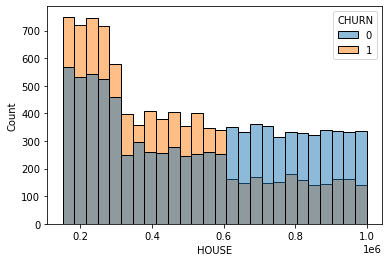

In [52]:
sns.histplot(x='HOUSE', data =mobile_null, hue = 'CHURN')
plt.show()

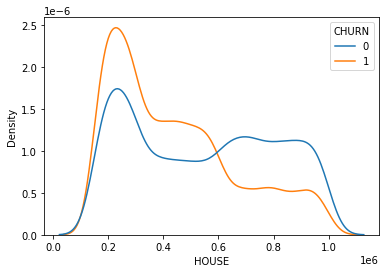

In [53]:
sns.kdeplot(x='HOUSE', data =mobile_null, hue = 'CHURN', common_norm=False) 
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
60000달러를 기준으로 이탈, 잔여가 확실하게 구분된다.
~60000는 이탈,60000~는 잔여로 나타난다.

② 수치화 : 로지스틱회귀

In [43]:
temp = mobile.loc[mobile['HOUSE'].notnull()] 

model = sm.Logit(temp['CHURN'], temp['HOUSE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687266
         Iterations 2
HOUSE    6.401120e-47
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
수치화를 통해 보았을 때, 상관관계가 강하게 있어보인다.
혹시 이사를 자주 하는 사람이 아닐까?
출장을 온 사람들일까?

#### 4) HANDSET_PRICE --> CHURN

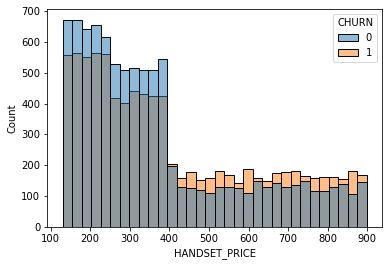

In [58]:
sns.histplot(x='HANDSET_PRICE', data =mobile, hue = 'CHURN')
plt.show()

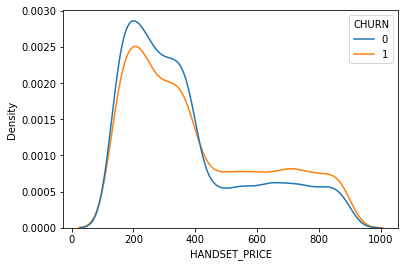

In [68]:
sns.kdeplot(x='HANDSET_PRICE', data =mobile, hue = 'CHURN', common_norm=False) 
plt.show()

수치화

In [65]:
model = sm.Logit(mobile['CHURN'], mobile['HANDSET_PRICE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
~400달러는 잔류, 400~ 이탈이 많았다.
비싼 휴대폰을 쓰는 사람은 왜 이탈이 많을까?


## 4.관계 정리

### 1) 강한관계의 변수

In [ ]:
HOUSE,OVERAGE

### 2) 약한관계의 변수

In [ ]:
INCOME,HANDSET_PRICE

### 3) 관계 없음

In [ ]:
CONSIDERING_CHANGE_OF_PLAN, REPORTED_SATISFACTION

## 5.추가 분석

In [ ]:
설문 만족도가 높고 변경 계획 설문에 긍정으로 답 한 데이터를 조사해보자
